# Progetto di Data and Web mining

Matteo Spanio, A.A. 2021/2022

# Random Forest

## Globally

In [1]:
import Zillow.data as zd
import warnings
warnings.filterwarnings("ignore")

train, validation, test = zd.get_preprocessed_data()

X_train, y_train = zd.split_x_y(train)
X_validation, y_validation = zd.split_x_y(validation)
X_test, y_test = zd.split_x_y(test)

I create a smaller dataset for cross validation tuning

In [2]:
from sklearn.model_selection import train_test_split

X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

len(X_small), len(y_small)

(21486, 21486)

In [10]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randf = RandomForestRegressor()

params = {
    'n_estimators': [x for x in range(100, 1001, 100)],
    'max_features': ['sqrt', 'log2', 1.0],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20, 50],
}

gscv = GridSearchCV(estimator = randf, 
                         return_train_score=True,
                         param_grid=params,
                         cv = 4,
                         scoring='neg_mean_absolute_error',
                         verbose=4,
                         n_jobs = -1)

gscv.fit(X_small, y_small)

gscv.best_params_

Fitting 4 folds for each of 750 candidates, totalling 3000 fits
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.072) total time=   8.6s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.071) total time=  17.0s
[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.075) total time=   8.6s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.073) total time=  17.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.073) total time=  25.5s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.073) total time=  33.7s
[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.074) total time=   8.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.073) total time=  16.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.071) total time=  25.5s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.071) total time=  33.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=(train=-0.027, test=-0.073) total time=  42.1s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=(train=-0.038, test=-0.073) total time=  15.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600;, score=(train=-0.038, test=-0.073) tot

[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-0.048, test=-0.073) total time=   3.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.047, test=-0.072) total time=   7.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-0.047, test=-0.072) total time=  10.5s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=-0.047, test=-0.072) total time=  13.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=(train=-0.047, test=-0.072) total time=  21.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=(train=-0.047, test=-0.072) total time=  28.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=(train=-0.047, test=-0.0

[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900;, score=(train=-0.038, test=-0.071) total time=  33.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-0.048, test=-0.071) total time=   3.5s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.048, test=-0.070) total time=   7.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-0.047, test=-0.070) total time=  10.3s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=-0.047, test=-0.070) total time=  13.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=(train=-0.047, test=-0.070) total time=  20.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=(train=-0.047, test=-0.070

[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=(train=-0.037, test=-0.073) total time=  37.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=(train=-0.047, test=-0.073) total time=  17.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700;, score=(train=-0.046, test=-0.073) total time=  24.4s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900;, score=(train=-0.047, test=-0.072) total time=  31.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=100;, score=(train=-0.055, test=-0.073) total time=   3.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=(train=-0.054, test=-0.072) total time=   6.7s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=(train=-0.054, test=-0.07

[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=(train=-0.063, test=-0.071) total time=   5.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300;, score=(train=-0.062, test=-0.071) total time=   7.7s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400;, score=(train=-0.063, test=-0.071) total time=  10.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=(train=-0.062, test=-0.071) total time=  20.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=(train=-0.062, test=-0.071) total time=  25.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500;, score=(train=-0.062, test=-0.

[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=(train=-0.063, test=-0.069) total time=  10.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800;, score=(train=-0.063, test=-0.069) total time=  20.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=(train=-0.063, test=-0.069) total time=  25.3s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=500;, score=(train=-0.063, test=-0.069) total time=  12.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=700;, score=(train=-0.063, test=-0.069) total time=  17.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900;, score=(train=-0.063, te

[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900;, score=(train=-0.062, test=-0.072) total time=  23.1s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=(train=-0.065, test=-0.072) total time=   2.5s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   4.9s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=(train=-0.064, test=-0.071) total time=   7.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500;, score=(train=-0.065, test=-0.069) total time=  12.2s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=700;, score=(train=-0.065, test=-0.071) total time=  16.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=900;, score=(train=-0.065, tes

[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=400;, score=(train=-0.062, test=-0.071) total time=  10.1s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.0s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=800;, score=(train=-0.062, test=-0.071) total time=  19.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1000;, score=(train=-0.063, test=-0.069) total time=  25.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500;, score=(train=-0.065, test=-0.071) total time=  12.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=700;, score=(train=-0.065, test=-0.069) total time=  16.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=900;, score=(train=-0.065, te

[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=5, n_estimators=1000;, score=(train=-0.068, test=-0.071) total time=  16.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=400;, score=(train=-0.068, test=-0.071) total time=   6.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=600;, score=(train=-0.068, test=-0.070) total time=  10.2s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=800;, score=(train=-0.068, test=-0.071) total time=  13.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000;, score=(train=-0.068, test=-0.070) total time=  17.1s
[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=400;, score=(train=-0.068, test=-0.071) total time=   6.9s
[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=600;, score=(train=-0.068, te

[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.068, test=-0.071) total time=   5.1s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=500;, score=(train=-0.068, test=-0.071) total time=   8.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=700;, score=(train=-0.068, test=-0.071) total time=  12.0s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=900;, score=(train=-0.068, test=-0.071) total time=  14.9s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=100;, score=(train=-0.068, test=-0.070) total time=   1.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=(train=-0.068, test=-0.071) total time=   3.4s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=300;, score=(train=-0.068, tes

[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.029, test=-0.074) total time=   3.2s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.073) total time=   6.4s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=-0.027, test=-0.073) total time=   9.8s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=(train=-0.027, test=-0.073) total time=  16.2s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=700;, score=(train=-0.027, test=-0.073) total time=  22.6s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900;, score=(train=-0.027, test=-0.073) total time=  28.9s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.041, test=-0.074) tota

[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=800;, score=(train=-0.068, test=-0.071) total time=  13.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=(train=-0.068, test=-0.071) total time=  17.1s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.071) total time=  13.0s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.071) total time=  19.5s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.071) total time=  26.0s
[CV 3/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=(train=-0.027, test=-0.073) total time=  32.6s
[CV 4/4] END max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=(train=-0.039, test=-0.073

[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=100;, score=(train=-0.065, test=-0.071) total time=   1.9s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=200;, score=(train=-0.065, test=-0.071) total time=   3.8s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=300;, score=(train=-0.065, test=-0.071) total time=   5.6s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=400;, score=(train=-0.065, test=-0.071) total time=   7.6s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  11.3s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=800;, score=(train=-0.064, test=-0.071) total time=  15.1s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=1000;, score=(train=-0.064, test=-0.0

[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=(train=-0.064, test=-0.071) total time=   1.9s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   3.6s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=300;, score=(train=-0.064, test=-0.071) total time=   5.4s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=400;, score=(train=-0.064, test=-0.071) total time=   7.2s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  10.7s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=(train=-0.065, test=-0.069) total time=  14.3s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=(train=-0.064, test=-0.0

[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=700;, score=(train=-0.064, test=-0.070) total time=  12.5s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=900;, score=(train=-0.064, test=-0.070) total time=  16.2s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=(train=-0.064, test=-0.071) total time=   1.9s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   3.6s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=(train=-0.064, test=-0.070) total time=   5.4s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=(train=-0.064, test=-0.070) total time=   7.1s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600;, score=(train=-0.064, test=

[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  10.6s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=(train=-0.064, test=-0.071) total time=  14.2s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=(train=-0.064, test=-0.069) total time=  17.9s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500;, score=(train=-0.064, test=-0.071) total time=   8.9s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=700;, score=(train=-0.064, test=-0.071) total time=  12.3s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=900;, score=(train=-0.064, test=-0.069) total time=  16.3s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=100;, score=(train=-0.064, test=

[CV 3/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=600;, score=(train=-0.067, test=-0.071) total time=   9.2s
[CV 3/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=800;, score=(train=-0.067, test=-0.071) total time=  12.0s
[CV 2/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=1000;, score=(train=-0.067, test=-0.068) total time=  15.2s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=500;, score=(train=-0.068, test=-0.071) total time=   6.0s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=700;, score=(train=-0.068, test=-0.071) total time=   8.4s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=900;, score=(train=-0.069, test=-0.068) total time=  10.9s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=100;, score=(train=-0.069, test=-

[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=300;, score=(train=-0.068, test=-0.071) total time=   3.6s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=500;, score=(train=-0.069, test=-0.068) total time=   6.1s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=700;, score=(train=-0.069, test=-0.070) total time=   8.5s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=900;, score=(train=-0.069, test=-0.070) total time=  11.0s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=(train=-0.069, test=-0.070) total time=   1.2s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=(train=-0.068, test=-0.071) total time=   1.2s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=200;, score=(train=-0.068, test=-0

[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=1000;, score=(train=-0.069, test=-0.068) total time=  12.3s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500;, score=(train=-0.069, test=-0.070) total time=   6.3s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=700;, score=(train=-0.069, test=-0.070) total time=   8.8s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=900;, score=(train=-0.069, test=-0.068) total time=  11.2s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=100;, score=(train=-0.069, test=-0.068) total time=   1.2s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=200;, score=(train=-0.069, test=-0.068) total time=   2.5s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.068, tes

[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=200;, score=(train=-0.069, test=-0.070) total time=   2.4s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.069, test=-0.070) total time=   3.7s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=400;, score=(train=-0.069, test=-0.070) total time=   4.9s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=600;, score=(train=-0.069, test=-0.070) total time=   7.4s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=800;, score=(train=-0.069, test=-0.070) total time=   9.7s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=1000;, score=(train=-0.068, test=-0.070) total time=  12.3s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=400;, score=(train=-0.068, te

[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=900;, score=(train=-0.048, test=-0.074) total time= 3.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=(train=-0.049, test=-0.072) total time=  48.4s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=(train=-0.049, test=-0.072) total time= 1.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=(train=-0.049, test=-0.071) total time= 1.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=600;, score=(train=-0.049, test=-0.071) total time= 2.4min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=800;, score=(train=-0.049, test=-0.071) total time= 3.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=(train=-0.049, test=-0.071) total time

[CV 3/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=(train=-0.048, test=-0.073) total time= 3.7min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=-0.049, test=-0.074) total time=  23.6s
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=(train=-0.049, test=-0.074) total time=  47.4s
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=(train=-0.048, test=-0.074) total time= 1.2min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=(train=-0.048, test=-0.074) total time= 1.6min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=600;, score=(train=-0.048, test=-0.074) total time= 2.4min
[CV 3/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=800;, score=(train=-0.048, test=-0.073) total

[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=(train=-0.055, test=-0.071) total time=  47.5s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=(train=-0.055, test=-0.071) total time= 1.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=(train=-0.055, test=-0.071) total time= 1.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=600;, score=(train=-0.055, test=-0.071) total time= 2.3min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=800;, score=(train=-0.055, test=-0.071) total time= 3.1min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=1000;, score=(train=-0.055, test=-0.071) total time= 3.9min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=500;, score=(train=-0.061, test=-0.070) tot

[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=100;, score=(train=-0.062, test=-0.071) total time=  22.1s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=200;, score=(train=-0.062, test=-0.071) total time=  44.3s
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=300;, score=(train=-0.061, test=-0.072) total time= 1.1min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=400;, score=(train=-0.061, test=-0.072) total time= 1.5min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=600;, score=(train=-0.061, test=-0.072) total time= 2.2min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=800;, score=(train=-0.061, test=-0.072) total time= 3.0min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=1000;, score=(train=-0.061, test=-0.070) tot

{'max_features': 'log2',
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'n_estimators': 700}

In [28]:
gscv.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'n_estimators': 700}

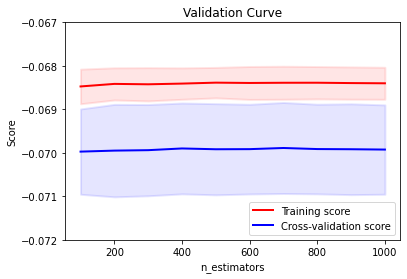

In [23]:
import Zillow.visualization as zv

zv.plot_grid_search_validation_curve(gscv, 'n_estimators', ylim=(-.072,-.067))

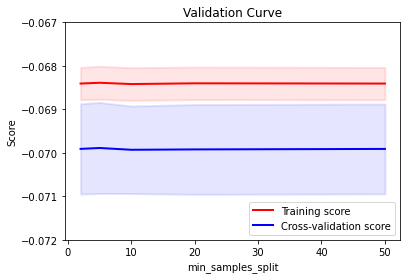

In [22]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_split', ylim=(-.072,-.067))

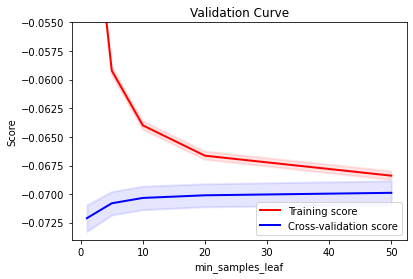

In [15]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_leaf', ylim=(-.074,-.055))

Sembra che il variare del numero di alberi e il minimo numero di campioni per ogni nodo abbia poco impatto sulla performance del modello, mentre sembra che aumentare il numero di campioni per foglia porti verso una convergenza.

A questo punto potrebbe valere la pena studiare ulteriormente cosa succede al variare del parametro più significativo. I parametri utilizzati saranno quelli ottimi individuati dal precedente `gridsearchCV`.

In [127]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randf = RandomForestRegressor()

params = {
    'n_estimators': [700],
    'max_features': ['log2'],
    'min_samples_split': [5],
    'min_samples_leaf': [x for x in range(10, 1001, 10)],
}

gscv = GridSearchCV(estimator = randf, 
                         return_train_score=True,
                         param_grid=params,
                         cv = 4,
                         scoring='neg_mean_absolute_error',
                         verbose=1,
                         n_jobs = -1)

gscv.fit(X_small, y_small)
gscv.best_params_, gscv.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits
CPU times: user 5.59 s, sys: 96.3 ms, total: 5.69 s
Wall time: 4min 20s


({'max_features': 'log2',
  'min_samples_leaf': 310,
  'min_samples_split': 5,
  'n_estimators': 700},
 -0.06976834930619988)

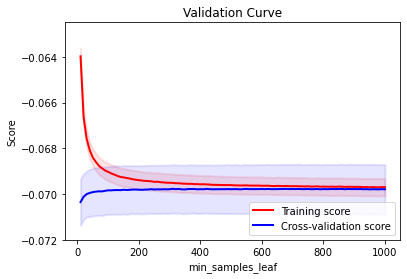

In [128]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_leaf', ylim=(-.072,-.0625))

All'aumentare del numero di campioni per foglia diminuisce l'errore del validation set, ma 

In [10]:
rf = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           max_depth=30,
                           min_samples_leaf=310,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_validation)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07059
 Mean squared error: 0.02984
           R2 score: 0.00714


## Feature selection

Grazie alla random forest abbiamo anche la possibilità di ottenere la valutazione delle features maggiormente usate dagli alberi, e quindi determinarne l'importanza, se ci sono colonne correlate o del tutto inutilizzate potrebbe essere molto utile rimuoverle

In [133]:
rf.feature_importances_

array([3.57075411e-02, 3.67449465e-02, 9.74368673e-02, 1.00319924e-01,
       3.01771830e-03, 5.41384017e-02, 5.53631358e-02, 4.73454288e-02,
       6.68259949e-03, 5.82287782e-02, 4.73219640e-03, 8.20715304e-02,
       7.78171294e-02, 6.65232581e-02, 1.26541728e-01, 5.52745245e-03,
       6.99663331e-03, 2.24321186e-02, 2.88453327e-02, 1.67234335e-02,
       1.50475512e-04, 5.82556667e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.56835843e-03, 1.20654503e-04,
       1.14616117e-02, 1.31434554e-03, 2.79121593e-05, 2.73460728e-03,
       3.76607453e-05, 2.37939223e-04, 5.89887060e-03, 2.28450160e-03,
       0.00000000e+00, 1.03871374e-04, 3.00507660e-03, 3.31149279e-03,
       4.35222362e-03, 0.00000000e+00, 0.00000000e+00, 4.82593408e-03,
       0.00000000e+00, 1.27473255e-03, 0.00000000e+00, 0.00000000e+00,
       3.19735070e-04, 2.93249912e-04, 0.00000000e+00, 6.69885844e-03,
       0.00000000e+00, 2.33280566e-04, 3.42369781e-03, 1.52606140e-03,
      

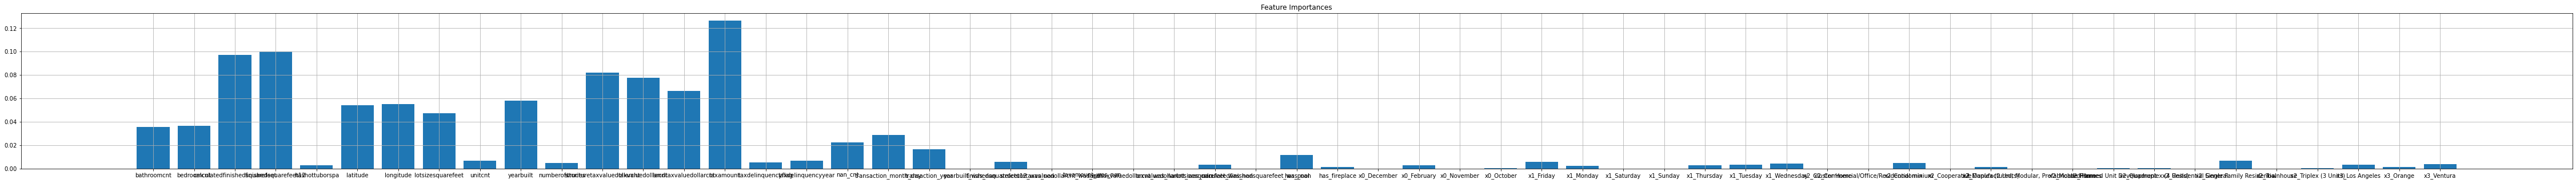

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_names = X_train.columns.to_list()

fig, ax = plt.subplots(figsize=(80,5))
ax.bar(range(0,X_train.shape[1]), rf.feature_importances_)
ax.set_title("Feature Importances")
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(feature_names)
ax.grid();

Come si vede dai grafici molte delle feature che sono state aggiunte sono del tutto inutilizzate

In [127]:
%%time
from sklearn.model_selection import cross_val_score
import numpy as np

best_features = np.argsort(rf.feature_importances_)[::-1]

rmae = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestRegressor(n_estimators=700,
                                     min_samples_split=5,
                                     min_samples_leaf=310,
                                     max_features='log2',
                                     random_state=42)
    scores = cross_val_score(rf_small, 
                             X_small.iloc[:,best_features[:f]], y_small, 
                             cv=4, scoring='neg_mean_absolute_error', n_jobs=-1)
    rmae += [-scores.mean()]
    
print ("Full score:", rmae[-1])
print ("Best score:", min(rmae))

Full score: 0.069911378895871
Best score: 0.06990763237795906
CPU times: user 1.52 s, sys: 424 ms, total: 1.95 s
Wall time: 12min


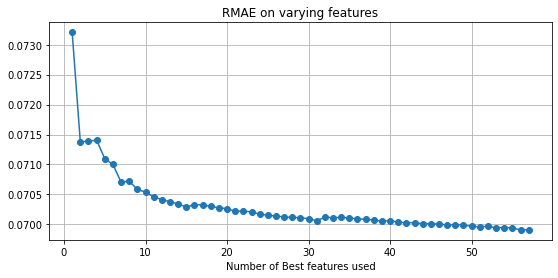

In [128]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(range(1,len(best_features)+1), rmae, 'o-', label="RMAE")
ax.set_title("RMAE on varying features")
ax.set_xlabel("Number of Best features used")
ax.grid();

Da un'euristica veloce si vede che dopo le 30 feature, ogni aggiunta influisce in maniera minimale sul miglioramento del modello, ma il punto di ottimo si ha usando tutte le feature a disposizione. Ad ogni modo si vede dal vettore `rf.feature_importances_` che alcuni parametri hanno influenza pari a 0.

In [139]:
# features woth 0.0 influence in random forest
np.array(feature_names)[np.argsort(rf.feature_importances_)[::-1][-sum(rf.feature_importances_ == 0):]]

array(['x2_Cooperative', 'x2_Commercial/Office/Residential mix',
       'x2_Manufactured, Modular, Prefabricated Homes', 'x2_Mobile Home',
       'x1_Saturday', 'x2_Cluster Home',
       'structuretaxvaluedollarcnt_was_nan', 'x2_Residential General',
       'taxamount_was_nan', 'landtaxvaluedollarcnt_was_nan',
       'x2_Townhouse', 'taxvaluedollarcnt_was_nan'], dtype='<U45')

In [140]:
%%time
from sklearn.feature_selection import RFECV

rf_small = RandomForestRegressor(n_estimators=700,
                                 min_samples_split=5,
                                 min_samples_leaf=310,
                                 max_features='log2',
                                 random_state=42)
selector = RFECV(rf_small,
                 step=1,
                 cv=4,
                 scoring='neg_mean_absolute_error',
                 min_features_to_select=5,
                 verbose=1,
                 n_jobs=-1)
selector.fit(X_small,y_small);

CPU times: user 10.3 s, sys: 108 ms, total: 10.4 s
Wall time: 5min 47s


RFECV(cv=4,
      estimator=RandomForestRegressor(max_features='log2', min_samples_leaf=310,
                                      min_samples_split=5, n_estimators=700,
                                      random_state=42),
      min_features_to_select=5, n_jobs=-1, scoring='neg_mean_absolute_error',
      verbose=1)

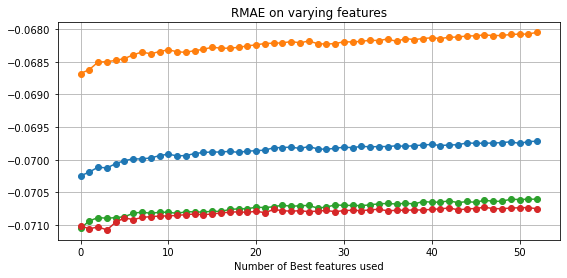

In [145]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot( selector.grid_scores_, 'o-', label="cross validation score")
ax.set_title("RMAE on varying features")
ax.set_xlabel("Number of Best features used")
ax.grid();

In [146]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Come si vede dai grafici dalla trentesima feature in poi l'apporto di ogni variabile è molto piccolo, il recursive feature eliminator però indica che il modello migliore è quello che tiene conto di tutte le variabili.

Ad ogni modo controllando la matrice di correlazione alcune feature sembrano essere fortemente correlate tra loro:

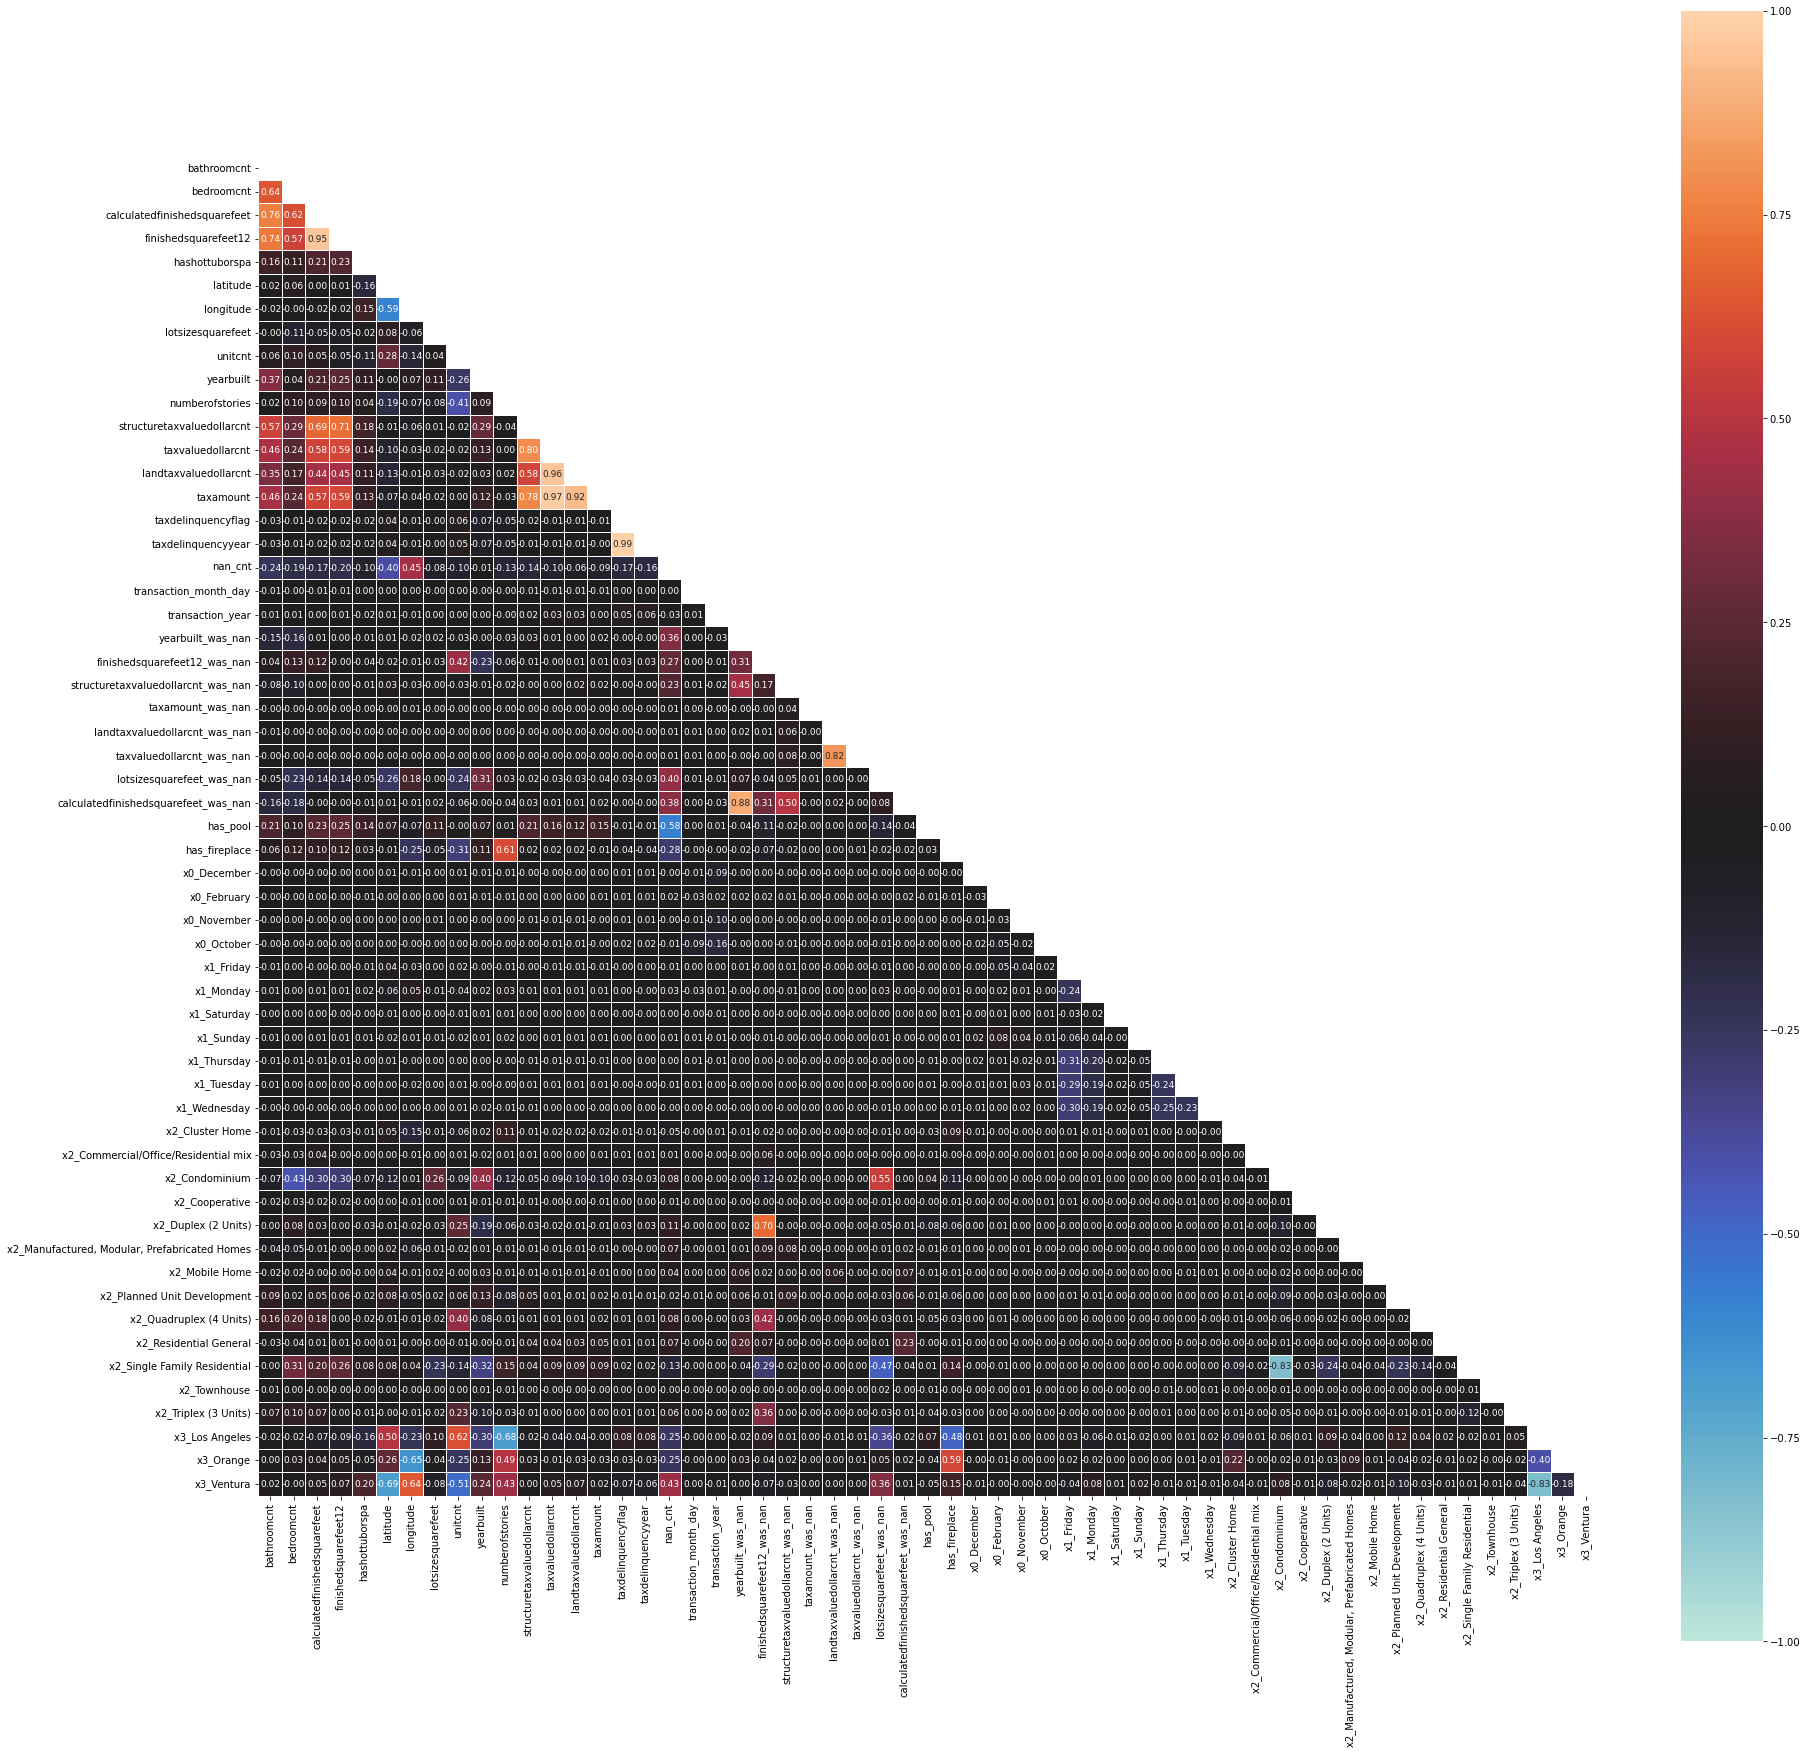

In [49]:
fig, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(data=X_train.corr(),
            mask=np.triu(np.ones_like(X_train.corr(), dtype=bool)),
            vmax=1.0,
            vmin=-1.0,
            center=0,
            square=True,
            annot=True,
            fmt=".2f",
            annot_kws={"size": 9},
            linewidths=.5,
            ax=ax);

In [46]:
from pprint import pprint
threshold = 0.90

for r in corr.columns:
    for c in corr.columns:
        if abs(corr.loc[r, c]) >= threshold and corr.columns.get_loc(r) > corr.columns.get_loc(
                c):  # check also to take only values under the main diagonal (to avoid repetitions)
            pprint({'col1':r, 'col2':c, 'corr':corr.loc[r, c]})


{'col1': 'finishedsquarefeet12',
 'col2': 'calculatedfinishedsquarefeet',
 'corr': 0.9535139146654592}
{'col1': 'landtaxvaluedollarcnt',
 'col2': 'taxvaluedollarcnt',
 'corr': 0.9566946884218183}
{'col1': 'taxamount', 'col2': 'taxvaluedollarcnt', 'corr': 0.9689698681913027}
{'col1': 'taxamount',
 'col2': 'landtaxvaluedollarcnt',
 'corr': 0.9229993386067722}
{'col1': 'taxdelinquencyyear',
 'col2': 'taxdelinquencyflag',
 'corr': 0.9860870751415667}


In particolare `finishedsquarefeet12` e `calculatedfinishedsquarefeet`, due tra le feature più importanti calcolate dalla RandomForest hanno un indice di correlazione pari a 0.95.
Inoltre `taxamount` è fortemente correlata con `landtaxvaluedollarcnt` e `taxvaluedollarcnt` (correlate anch'esse tra loro), e si tratta di altre feature valutate come fortemente importanti dalla RandomForest.

Una correlazione così forte indica che le variabili contengono sostanzialmente la stessa informazione e tra queste ne basta una per spiegare l'informazione, rimuovo quindi quelle che originariamente avevano meno dati mancanti (si rimuovono anche `taxamount_was_nan`, `landtaxvaluedollarcnt_was_nan`, `finishedsquarefeet12_was_nan`)

Invece `taxdelinquencyyear` e `taxdelinquencyflag` sono fortemente correlate in quanto `taxdelinquencyyear` contiene implicitamente l'informazione della flag, cioè se non sono state pagate le tasse da un certo numero di anni, allora si può dedurre l'informazione se siano state pagate o meno le tasse. In questo caso si terrà l'informazione più ricca (`taxdelinquencyyear`).

In [58]:
drop_list = [
    'finishedsquarefeet12',
    'finishedsquarefeet12_was_nan',
    'taxamount',
    'taxamount_was_nan',
    'landtaxvaluedollarcnt',
    'landtaxvaluedollarcnt_was_nan',
    'taxdelinquencyflag'
]

X_train_light = X_train.drop(drop_list, axis=1)
X_valid_light = X_validation.drop(drop_list, axis=1)

In [59]:
feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=100,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_light, y_train)

y_pred = feature_selector.predict(X_valid_light)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07062
 Mean squared error: 0.02984
           R2 score: 0.00718


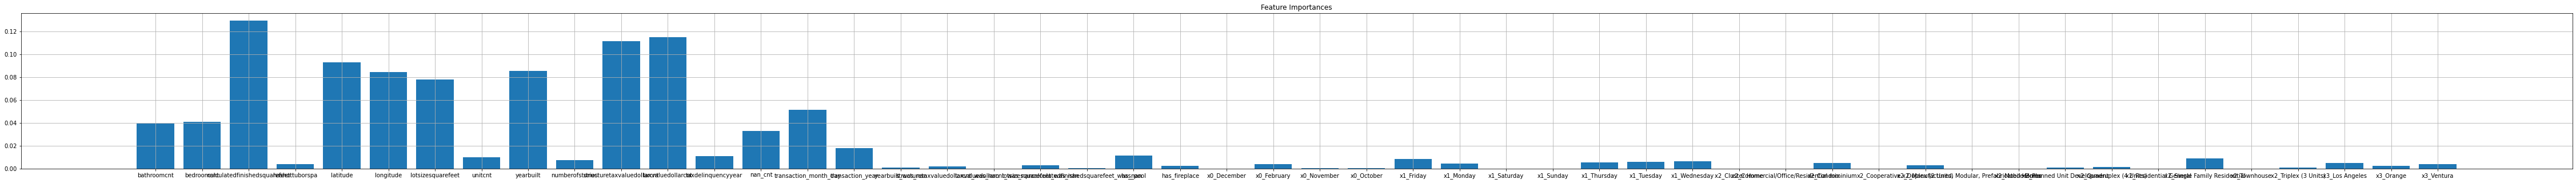

In [60]:
feature_names = X_train_light.columns.to_list()

fig, axs = plt.subplots(figsize=(80,5))
axs.bar(range(0,X_train_light.shape[1]), feature_selector.feature_importances_)
axs.set_title("Feature Importances")
axs.set_xticks(range(X_train_light.shape[1]))
axs.set_xticklabels(feature_names)
axs.grid();

Si osserva dal grafico che ora le colonne rimaste hanno acquisito maggiore importanza nella random forest.

Inoltre molte delle feature aggiunte hanno una bassa importanza nella creazione di split tra i nodi della random forest, in particolare 7 di queste non sono di alcuna utilità:

In [135]:
# features woth 0.0 influence in random forest
np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]

array(['taxamount', 'taxdelinquencyflag', 'yearbuilt',
       'lotsizesquarefeet', 'finishedsquarefeet12', 'unitcnt',
       'hashottuborspa', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'longitude', 'nan_cnt',
       'structuretaxvaluedollarcnt', 'taxdelinquencyyear', 'bedroomcnt',
       'numberofstories', 'bathroomcnt', 'latitude',
       'finishedsquarefeet12_was_nan', 'transaction_month_day',
       'structuretaxvaluedollarcnt_was_nan', 'landtaxvaluedollarcnt',
       'has_fireplace', 'calculatedfinishedsquarefeet_was_nan',
       'x0_October', 'x1_Friday', 'x0_February', 'x0_December',
       'yearbuilt_was_nan', 'taxvaluedollarcnt_was_nan', 'has_pool',
       'landtaxvaluedollarcnt_was_nan', 'taxamount_was_nan',
       'transaction_year', 'x0_November', 'lotsizesquarefeet_was_nan'],
      dtype='<U45')

In [74]:
least_important_features =np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]
X_train_light = X_train_light.drop(least_important_features, axis=1)
X_valid_light = X_valid_light.drop(least_important_features, axis=1)

In [82]:
feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=100,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_light, y_train)

y_pred = feature_selector.predict(X_valid_light)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07064
 Mean squared error: 0.02983
           R2 score: 0.00761


In [86]:
import pandas as pd

train, validation, test = zd.get_preprocessed_data()
train = pd.concat([train, validation], axis=0, ignore_index=True)

X_train, y_train = zd.split_x_y(train)
X_test, y_test = zd.split_x_y(test)

X_train = X_train.drop([
    'finishedsquarefeet12',
    'finishedsquarefeet12_was_nan',
    'taxamount',
    'taxamount_was_nan',
    'landtaxvaluedollarcnt',
    'landtaxvaluedollarcnt_was_nan',
    'taxdelinquencyflag',
    'x2_Mobile Home', 'x2_Manufactured, Modular, Prefabricated Homes',
       'x2_Cooperative', 'x2_Residential General',
       'x2_Commercial/Office/Residential mix', 'x2_Townhouse',
       'taxvaluedollarcnt_was_nan'
], axis=1)

X_test = X_test.drop([
    'finishedsquarefeet12',
    'finishedsquarefeet12_was_nan',
    'taxamount',
    'taxamount_was_nan',
    'landtaxvaluedollarcnt',
    'landtaxvaluedollarcnt_was_nan',
    'taxdelinquencyflag',
    'x2_Mobile Home', 'x2_Manufactured, Modular, Prefabricated Homes',
       'x2_Cooperative', 'x2_Residential General',
       'x2_Commercial/Office/Residential mix', 'x2_Townhouse',
       'taxvaluedollarcnt_was_nan'
], axis=1)

feature_selector.fit(X_train, y_train)

y_pred = feature_selector.predict(X_test)

print_measure(y_true=y_test, y_pred=y_pred)

Mean absolute error: 0.06962
 Mean squared error: 0.02838
           R2 score: 0.00814


## Random forest per contea

Assumendo che i migliori parametri per la random forest siano quelli trovati dalla cross validation generale si procede all'analisi per contea

In [111]:
drop_list = [
    'finishedsquarefeet12',
    'finishedsquarefeet12_was_nan',
    'taxamount',
    'taxamount_was_nan',
    'landtaxvaluedollarcnt',
    'landtaxvaluedollarcnt_was_nan',
    'taxdelinquencyflag',
    'taxvaluedollarcnt_was_nan'
]

In [112]:
import Zillow.data as zd
from Zillow.transform import ZillowTransformer, ZillowEncoder
from Zillow.types import County, Features as ft

import warnings
warnings.filterwarnings("ignore")
# Orange
o_train, o_validation, o_test = zd.get_preprocessed_data(County.ORANGE)

# Ventura
v_train, v_validation, v_test = zd.get_preprocessed_data(County.VENTURA)

# Los Angeles
la_train, la_validation, la_test = zd.get_preprocessed_data(County.LOS_ANGELES)

In [113]:
#train = pd.concat([o_train, o_validation], axis=0, ignore_index=True)
X_train_o, y_train_o = zd.split_x_y(o_train)
X_test_o, y_test_o = zd.split_x_y(o_validation)

X_train_o = X_train_o.drop(drop_list, axis=1)
# X_test_o = X_test_o.drop(drop_list, axis=1)

feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=100,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_o, y_train_o)

y_pred = feature_selector.predict(X_test_o)

print_measure(y_true=y_test_o, y_pred=y_pred)

Mean absolute error: 0.06205
 Mean squared error: 0.02403
           R2 score: 0.00144


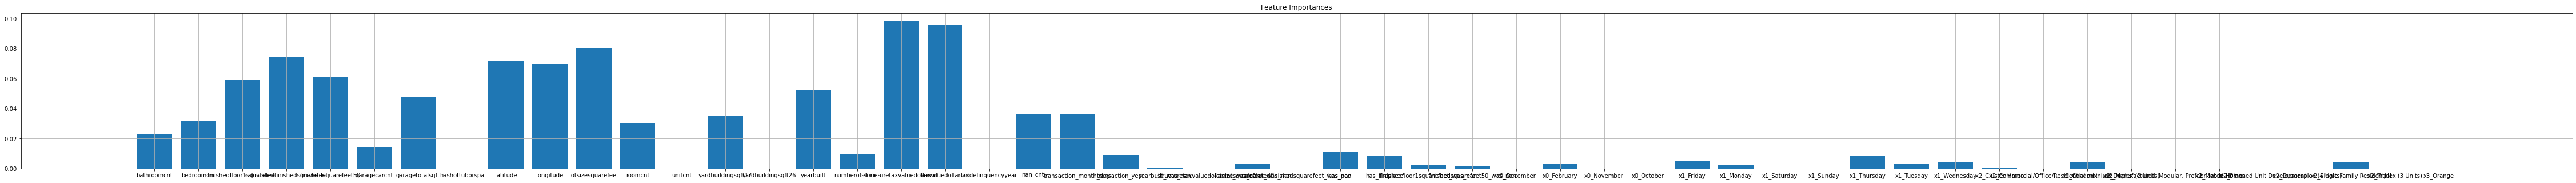

In [114]:
feature_names = X_train_o.columns.to_list()

fig, axs = plt.subplots(figsize=(80,5))
axs.bar(range(0,X_train_o.shape[1]), feature_selector.feature_importances_)
axs.set_title("Feature Importances")
axs.set_xticks(range(X_train_o.shape[1]))
axs.set_xticklabels(feature_names)
axs.grid();

In [115]:
np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]

array(['hashottuborspa', 'unitcnt', 'yardbuildingsqft26', 'x3_Orange',
       'taxdelinquencyyear', 'structuretaxvaluedollarcnt_was_nan',
       'x2_Triplex (3 Units)', 'x0_December', 'x0_November',
       'x1_Saturday', 'x1_Sunday', 'x2_Commercial/Office/Residential mix',
       'x2_Duplex (2 Units)',
       'x2_Manufactured, Modular, Prefabricated Homes', 'x2_Mobile Home',
       'x2_Planned Unit Development', 'x2_Quadruplex (4 Units)',
       'calculatedfinishedsquarefeet_was_nan'], dtype='<U45')

In [116]:
least_important_features =np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]
X_train_o = X_train_o.drop(least_important_features, axis=1)
X_test_o = X_test_o.drop(least_important_features, axis=1)

In [117]:
feature_selector.fit(X_train_o, y_train_o)

y_pred = feature_selector.predict(X_test_o)

print_measure(y_true=y_test_o, y_pred=y_pred)

Mean absolute error: 0.06221
 Mean squared error: 0.02403
           R2 score: 0.00146


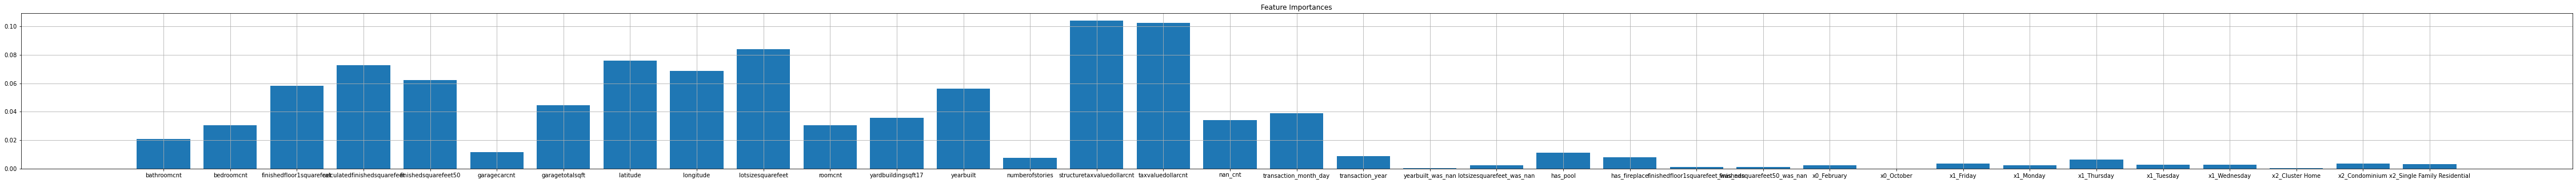

In [118]:
feature_names = X_train_o.columns.to_list()

fig, axs = plt.subplots(figsize=(80,5))
axs.bar(range(0,X_train_o.shape[1]), feature_selector.feature_importances_)
axs.set_title("Feature Importances")
axs.set_xticks(range(X_train_o.shape[1]))
axs.set_xticklabels(feature_names)
axs.grid();

In [98]:
# Ventura
train = pd.concat([v_train, v_validation], axis=0, ignore_index=True)
X_train_v, y_train_v = zd.split_x_y(train)
X_test_v, y_test_v = zd.split_x_y(v_test)

feature_selector.fit(X_train_v.drop(drop_list, axis=1), y_train_v)

y_pred = feature_selector.predict(X_test_v.drop(drop_list, axis=1))

print_measure(y_true=y_test_v, y_pred=y_pred)

Mean absolute error: 0.06075
 Mean squared error: 0.02840
           R2 score: 0.00765


In [99]:
# LA
train = pd.concat([la_train, la_validation], axis=0, ignore_index=True)
X_train_la, y_train_la = zd.split_x_y(train)
X_test_la, y_test_la = zd.split_x_y(la_test)

feature_selector.fit(X_train_la.drop(drop_list, axis=1), y_train_la)

y_pred = feature_selector.predict(X_test_la.drop(drop_list, axis=1))

print_measure(y_true=y_test_la, y_pred=y_pred)

Mean absolute error: 0.07422
 Mean squared error: 0.02890
           R2 score: 0.00838


Text(0.5, 1.0, 'MAE per area with random forest')

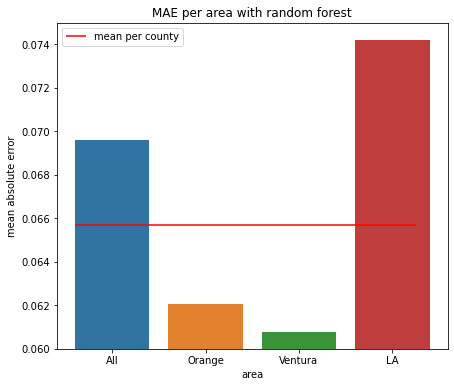

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(7, 6))
data = pd.DataFrame({'score': [0.06962, 0.06205, 0.06075, 0.07422], 'area': ['All', 'Orange', 'Ventura', 'LA']})
sns.barplot(data=data, x='area', y='score', ax=ax)
ax.set_ylim(0.060,0.075);
ax.set_ylabel('mean absolute error')
ax.hlines(np.mean([0.07422, 0.06075, 0.06205]), xmin=-0.4, xmax=3.25, colors='red', label='mean per county');
ax.legend()
ax.set_title('MAE per area with random forest')